## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [3]:
df=pd.read_csv("ufo_sightings.csv")

### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [5]:
df.info()
non_null_df = df.dropna()
non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64683 entries, 0 to 64682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    64683 non-null  int64  
 1   Date_Time            64683 non-null  object 
 2   City                 64676 non-null  object 
 3   State/Province       59973 non-null  object 
 4   Country              56927 non-null  object 
 5   UFO_Shape            63124 non-null  object 
 6   Length_of_Encounter  64683 non-null  float64
 7   Described_Duration   64683 non-null  object 
 8   Description          64668 non-null  object 
 9   Date_Documented      64683 non-null  object 
 10  Latitude             64683 non-null  float64
 11  Longitude            64683 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 53562 entries, 0 to 64682
Data columns (total 12 columns):
 #   Column              

### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [9]:
non_null_df.head()
filtered_df = non_null_df.drop(["Described_Duration","Description","Date_Documented"], axis = 1)
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53562 entries, 0 to 64682
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    53562 non-null  int64  
 1   Date_Time            53562 non-null  object 
 2   City                 53562 non-null  object 
 3   State/Province       53562 non-null  object 
 4   Country              53562 non-null  object 
 5   UFO_Shape            53562 non-null  object 
 6   Length_of_Encounter  53562 non-null  float64
 7   Latitude             53562 non-null  float64
 8   Longitude            53562 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [45]:
filtered_df["Date_Time"] = pd.to_datetime(filtered_df["Date_Time"])
filtered_df.head()
# filtered_df["City"].value_counts()

City
Seattle              383
Phoenix              379
Las Vegas            294
Los Angeles          290
Portland             277
                    ... 
Smoaks                 1
Whitehouse             1
Hesperia (Sse Of)      1
Gilliam                1
Barron                 1
Name: count, Length: 10620, dtype: int64

## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

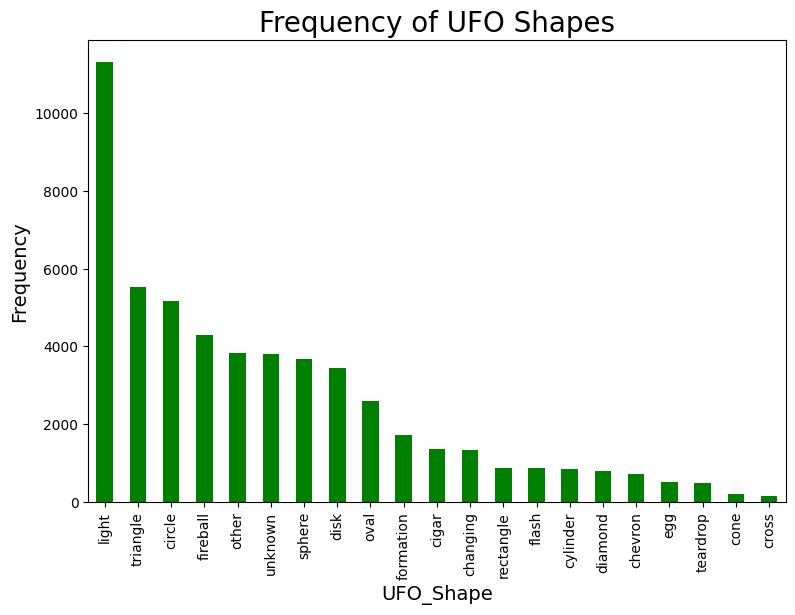

In [21]:
my_bar_plot = filtered_df["UFO_Shape"].value_counts().plot.bar(figsize = (9, 6), color = "green")
plt.title("Frequency of UFO Shapes", fontsize = 20);
plt.ylabel("Frequency", fontsize = 14);
plt.xlabel("UFO_Shape", fontsize = 14);

### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

Text(0, 0.5, 'Number of Sightings')

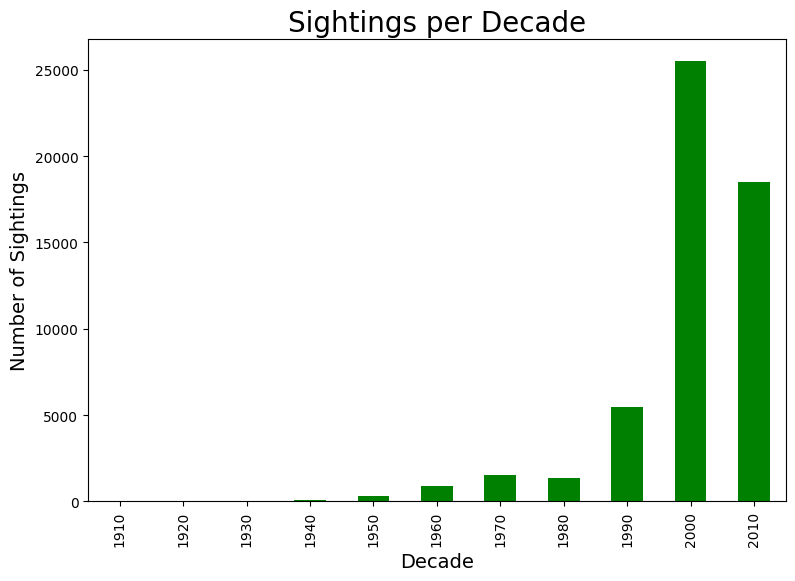

In [27]:
filtered_df["Sighting Year"] = filtered_df["Date_Time"].dt.year
# filtered_df.head()
filtered_df["10 Year Intervals"] = (filtered_df["Sighting Year"] // 10) * 10
filtered_df.head()
filtered_df["10 Year Intervals"].value_counts().sort_index().plot.bar(figsize = (9, 6), color = "green");
plt.title("Sightings per Decade", fontsize = 20);
plt.xlabel("Decade", fontsize = 14)
plt.ylabel("Number of Sightings", fontsize = 14);

### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

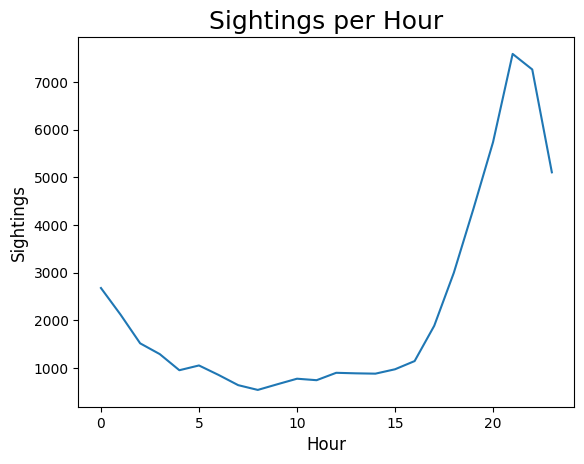

In [41]:
filtered_df["Sighting Hour"] = filtered_df["Date_Time"].dt.hour
# filtered_df["Sighting Hour"].value_counts().sort_index()

filtered_df["Sighting Hour"].value_counts().sort_index().plot.line()
plt.title("Sightings per Hour", fontsize = 18);
plt.xlabel("Hour", fontsize = 12);
plt.ylabel("Sightings", fontsize = 12);

### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * Light is the most frequently reported UFO shape.

2. Which shape is least frequently reported?
    * The cross is the least frequently reported UFO shape. 

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * The most sightings happen at 9 pm, or the 21st hour. There were 7,588 sightings at that hour followed by 7,262 sightings at 10 pm.   

4. Are there other factors that may account for this pattern in the data?
    * The fact that so many of the sightings happen at 9 pm could be explained by the fact that at that hour, in most places, the sun has set and someone would be more likely to 'see' a sighting, especially considering that the most frequently reported shape is in the form of 'light'.  

5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * The last three decades have the most sightings since the data began in 1910, especially the decade between 2010 and 2019, which reported over 25,000 sightings.  This may be explained by the increased prevalance of objects in the skies such as satallites, drones, etc.  This might also have to do with increased sophistication of technology to capture sightings.  

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * A recommendation for individuals interested in encourtering a UFO would be to situate yourself in the Western US.  The five cities with the most sightings are Seattle, Phoenix, Las Vega, Los Angeles and Portland.  I would also recommend looking for UFOs between 9 - 11 pm.  


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Grouped Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

<Axes: xlabel='State/Province'>

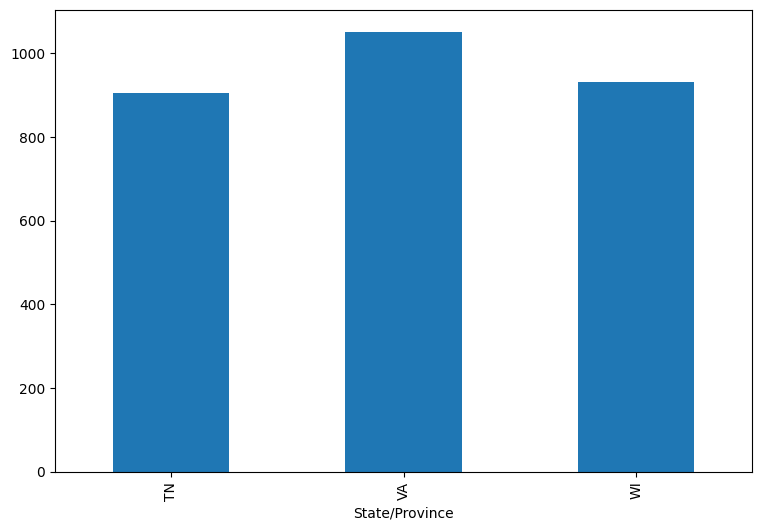

In [79]:
bonus_df = filtered_df[filtered_df["State/Province"].isin (["WI", "VA", "TN"])]
# bonus_df.value_counts()
bonus_df["State/Province"].value_counts().sort_index().plot.bar(figsize = (9, 6))
